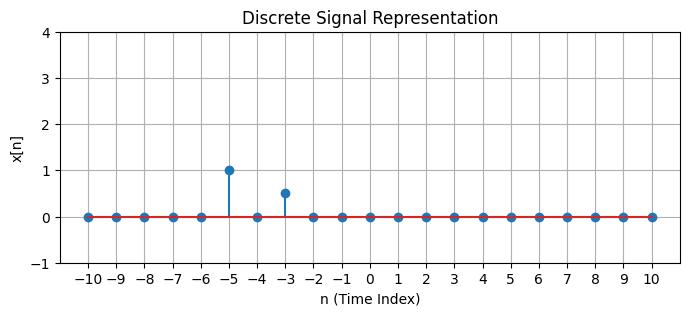

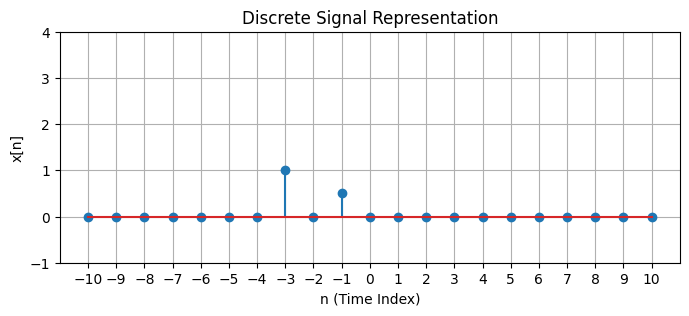

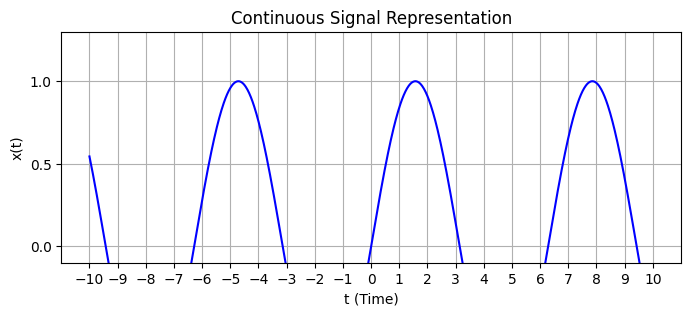

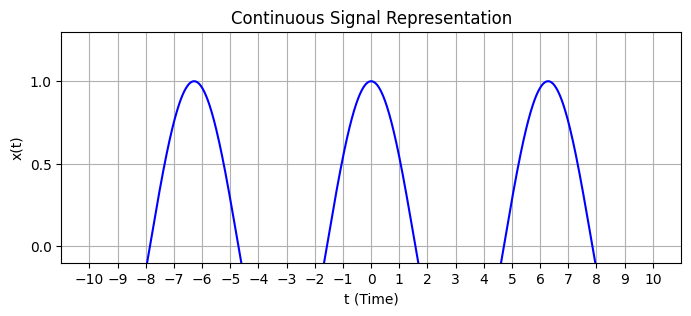

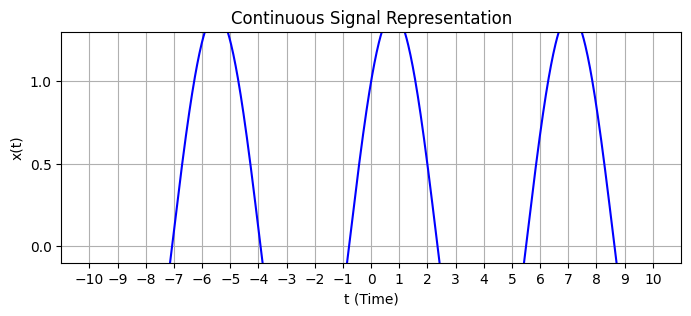

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os


class DiscreteSignal:
    def __init__(self, values: np.ndarray, INF: int):
        self.values = values  # Store the discrete signal values
        self.INF = INF  # Define the range of the signal

    def set_value_at_time(self, time: int, value):
        """Set the signal value at a specific time index."""
        if 0 <= time <= 2 * self.INF:
            self.values[time] = value  # Update the value at the specified index

    def shift_signal(self, shift: int):
        """Shift the signal by a given amount."""
        if shift > 0:
            # Shift to the right
            new_values = np.concatenate((np.zeros(shift), self.values[:-shift]))
        else:
            # Shift to the left
            new_values = np.concatenate((self.values[-shift:], np.zeros(-shift)))
        return DiscreteSignal(new_values, self.INF)  # Return new shifted signal

    def add(self, other: "DiscreteSignal"):
        """Add two discrete signals."""
        new_values = self.values + other.values  # Element-wise addition
        return DiscreteSignal(new_values, self.INF)

    def multiply(self, other: "DiscreteSignal"):
        """Multiply two discrete signals."""
        new_values = self.values * other.values  # Element-wise multiplication
        return DiscreteSignal(new_values, self.INF)

    def multiply_constant_factor(self, scaler):
        """Scale the signal by a constant factor."""
        new_values = self.values * scaler  # Multiply all values by the scaler
        return DiscreteSignal(new_values, self.INF)

    def plot_signal(self):
        """Plot the discrete signal."""
        plt.figure(figsize=(8, 3))
        plt.xticks(np.arange(-self.INF, self.INF + 1, 1))
        y_range = (-1, max(np.max(self.values), 3) + 1)
        plt.ylim(*y_range)
        plt.stem(np.arange(-self.INF, self.INF + 1, 1), self.values)
        plt.title("Discrete Signal Representation")
        plt.xlabel("n (Time Index)")
        plt.ylabel("x[n]")
        plt.grid(True)
        plt.show()

    def plot(
        self,
        signals: list["DiscreteSignal"],
        figure_title,
        super_title,
        subplot_titles,
        rows,
        columns,
        save_path,
    ):
        """Plot multiple discrete signals in subplots."""
        summed_signal = signals[-1]  # Last signal is the summed signal
        signals = signals[:-1]  # Exclude the summed signal from individual plots

        # Create a figure with a specified layout of subplots
        fig, axs = plt.subplots(rows, columns, figsize=(10, 10))
        y_range = (-1, max(np.max(self.values), 3) + 1)

        # Set the title for the overall figure
        fig.suptitle(super_title, fontsize=16)

        # Plot individual signals
        row, col = 0, 0
        for signal, subplot_title in zip(signals, subplot_titles):
            axs[row, col].stem(
                np.arange(-self.INF, self.INF + 1, 1),
                signal.values,
                basefmt="r-",
            )
            axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
            axs[row, col].set_ylim(*y_range)
            axs[row, col].set_title(subplot_title)
            axs[row, col].set_xlabel("n (Time Index)")
            axs[row, col].set_ylabel("x[n]")
            axs[row, col].grid(True)
            col += 1
            if col == columns:
                col = 0
                row += 1

        # Plot the summed signal in the last subplot
        axs[row, col].stem(
            np.arange(-self.INF, self.INF + 1, 1), summed_signal.values, basefmt="r-"
        )
        axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
        axs[row, col].set_ylim(*y_range)
        axs[row, col].set_title(subplot_titles[-1])
        axs[row, col].set_xlabel("n (Time Index)")
        axs[row, col].set_ylabel("x[n]")
        axs[row, col].grid(True)

        # Adjust layout to enhance appearance
        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.1)

        # Add a caption below the figure
        fig.text(
            0.5,
            0.01,
            figure_title,
            ha="center",
            fontsize=12,
        )

        # Save the figure to a specified path
        plt.savefig(save_path)

        # Display the plot
        # plt.show()


class ContinuousSignal:
    def __init__(self, func, INF: int):
        self.func = func  # Function representing the continuous signal
        self.INF = INF  # Define the range of the signal

    def shift(self, shift: int):
        """Shift the continuous signal."""
        return ContinuousSignal(lambda t: self.func(t - shift), self.INF)

    def add(self, other: "ContinuousSignal"):
        """Add two continuous signals."""
        return ContinuousSignal(lambda t: self.func(t) + other.func(t), self.INF)

    def multiply(self, other: "ContinuousSignal"):
        """Multiply two continuous signals."""
        return ContinuousSignal(lambda t: self.func(t) * other.func(t), self.INF)

    def multiply_constant_factor(self, scaler):
        """Scale the continuous signal by a constant factor."""
        return ContinuousSignal(lambda t: self.func(t) * scaler, self.INF)

    def plot_signal(self, minheight=0, maxheight=1, y_tick_spacing=0.5, color="blue"):
        """Plot the continuous signal."""
        t = np.linspace(-self.INF, self.INF + 0.01, 1000)
        plt.figure(figsize=(8, 3))
        plt.xticks(np.arange(-self.INF, self.INF + 1, 1))
        plt.plot(t, self.func(t), color=color)
        plt.ylim([minheight - 0.1, maxheight + 0.3])
        plt.yticks(np.arange(0, maxheight + y_tick_spacing, y_tick_spacing))
        plt.title("Continuous Signal Representation")
        plt.xlabel("t (Time)")
        plt.ylabel("x(t)")
        plt.grid(True)
        plt.show()

    def plot(
        self,
        continuous_signals: list["ContinuousSignal"],
        figure_title,
        super_title,
        subplot_titles,
        rows,
        columns,
        save_path,
        minheight=0,
        maxheight=1,
        y_tick_spacing=0.5,
        same_plot=False,
        label1="",
        label2="",
    ):
        """Plot multiple continuous signals in subplots."""
        t = np.linspace(-self.INF, self.INF + 0.01, 1000)
        reconstructed_signal = continuous_signals[-1]
        continuous_signals = continuous_signals[:-1]

        # Create a figure with a specified layout of subplots
        fig, axs = plt.subplots(rows, columns, figsize=(10, 10))

        # Set the title for the overall figure
        fig.suptitle(super_title, fontsize=16)

        # Plot individual continuous signals
        row, col = 0, 0
        for continuous_signal, subplot_title in zip(continuous_signals, subplot_titles):
            axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
            axs[row, col].set_yticks(
                np.arange(0, maxheight + y_tick_spacing, y_tick_spacing)
            )
            if same_plot:
                axs[row, col].plot(t, continuous_signal.func(t), label=label1)
                axs[row, col].plot(t, self.func(t), color="red", label=label2)
            else:
                axs[row, col].plot(t, continuous_signal.func(t))
            axs[row, col].set_ylim([minheight, maxheight])
            axs[row, col].set_title(subplot_title)
            axs[row, col].set_xlabel("t (Time)")
            axs[row, col].set_ylabel("x[t]")
            if same_plot:
                axs[row, col].legend()
            axs[row, col].grid(True)
            col += 1
            if col == columns:
                col = 0
                row += 1

        # Plot the reconstructed signal in the last subplot
        axs[row, col].set_xticks(np.arange(-self.INF, self.INF + 1, 1))
        axs[row, col].set_yticks(
            np.arange(0, maxheight + y_tick_spacing, y_tick_spacing)
        )
        if same_plot:
            axs[row, col].plot(t, reconstructed_signal.func(t), label=label1)
            axs[row, col].plot(t, self.func(t), color="red", label=label2)
        else:
            axs[row, col].plot(t, reconstructed_signal.func(t))
        axs[row, col].set_ylim([minheight, maxheight])
        axs[row, col].set_title(subplot_titles[-1])
        axs[row, col].set_xlabel("t (Time)")
        axs[row, col].set_ylabel("x[t]")
        if same_plot:
            axs[row, col].legend()
        axs[row, col].grid(True)

        # Adjust layout to enhance appearance
        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.1)

        # Add a caption below the figure
        fig.text(
            0.5,
            0.01,
            figure_title,
            ha="center",
            fontsize=12,
        )

        # Save the figure to a specified path
        plt.savefig(save_path)

        # Display the plot
        plt.show()


def example_usage():
    """An example of how to use the DiscreteSignal and ContinuousSignal classes."""
    INF = 10
    discrete_values = np.zeros(2 * INF + 1)  # Create an array of zeros
    discrete_signal = DiscreteSignal(discrete_values, INF)

    discrete_signal.set_value_at_time(5, 1)  # Set value at time index 5
    discrete_signal.set_value_at_time(7, 0.5)  # Set value at time index 7
    discrete_signal.plot_signal()  # Plot the discrete signal

    # Shift the discrete signal
    shifted_signal = discrete_signal.shift_signal(2)
    shifted_signal.plot_signal()  # Plot the shifted signal

    # Create and plot continuous signals
    continuous_signal_1 = ContinuousSignal(lambda t: np.sin(t), INF)
    continuous_signal_2 = ContinuousSignal(lambda t: np.cos(t), INF)

    continuous_signal_1.plot_signal()  # Plot the first continuous signal
    continuous_signal_2.plot_signal()  # Plot the second continuous signal

    # Add and plot continuous signals
    added_signal = continuous_signal_1.add(continuous_signal_2)
    added_signal.plot_signal()  # Plot the added signal


# Uncomment to run the example
example_usage()



In [ ]:
# 1. 生成数据

class DiscreteSignal : 
    def __init__(self, values : np.ndarray, INF: int) : 
        self.values = values 
        self.INF = INF

